![Kutz_Cover.png](Kutz_Cover.png)

<hr style="border:2px solid purple"> </hr>


__ME 535 Winter 2021 
<br>Computational Techniques in Mechanical Engineering__

__Linear Systems__ notebook

to accompany Ch. 2 of Data-Driven Modeling & Scientific Computation by J. Nathan Kutz


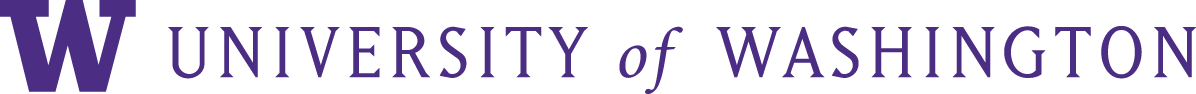

__Ch. 2 Linear Systems (systems of linear equations)__
<br><br>__linear__ $\iff$ each term involves an unknown with a constant coefficient (or just a constant)
<br>Start with $n$ equations in $n$ unknowns $x_0, x_1, \ldots , x_{n-1}$:

$$\begin{aligned}
a_{0,0} x_0 &+ a_{0,1} x_1 &+ \ldots &+ a_{0,n-1} x_{n-1} &= b_0& \\
a_{1,0} x_0 &+ a_{1,1} x_1 &+ \ldots &+ a_{1,n-1} x_{n-1} &= b_1& \\
\vdots & &\ddots &  &\vdots &\\
a_{n-2,0} x_0 &+ a_{n-2,1} x_1 &+ \ldots &+ a_{n-2,n-1} x_{n-1} &= b_{n-2}& \\
a_{n-1,0} x_0 &+ a_{n-1,1} x_1 &+ \ldots &+ a_{n-1,n-1} x_{n-1} &= b_{n-1}&
\end{aligned}$$

Nobody wants to write (or typeset) that over and over...
<br>So collect variables and Right-Hand Side (RHS) each as a __vector__ (1D array) with typical elements $x_j, b_i$
<br>Collect coefficient into __matrix__ (2D array) with typical element $a_{i,j} \;$: $ \qquad i \iff$ row; $j \iff$ column

Abbreviations: $\sum_{j=0}^{n-1} a_{i,j} x_j = b_i$; Einstein Summation Convention $\implies a_{i,j} x_j = b_i$ <br>Coordinate free notation: $A x = b$

## Section 2.1 - Direct Solution Methods for $A x=b$

Start with the original solution method: __Gaussian elimination__. 

>Note that the name is considered to be a historical misattribution. According to Wikipedia, the method was introduced in "Western" math by Newton, but the first known use occurred in China possibly over 2 millenia ago.

This basic matrix operation provides some excellent opportunities for organizing operations using `for()` loops, so let's take advantage of those opportunities to develop our execution control skills.

The basic idea is to create the augmented matrix $[A | b ]$ (by attaching the right-hand side as an extra column) and then systematically perform elementary row operations until the matrix becomes the identity. At the end of that process, the augmented column contains the solution $x$. (Conceptually simple, but not most efficient...)

Let's start by coding up simpler things and then working our way up to a full solver. Let's start by importing `numpy` (to get access to `array` capabilities) and creating a sample matrix (2D array) and vector (array with a single row or column).

The example in the book involves the matrix $a=[[1,1,1],[1,2,4],[1,3,9]]$. 
<br>There are many ways to create a corresponding array in python. <br>The "manual" approach (where you enter the desired values from the keyboard) is straightforward, but perhaps not terribly instructive. 
<br>Construct the array and print the array followed by its transpose.

In [2]:
import numpy as np #import numpy for access to array capabilities
a = np.array([[1,1,1],[1,2,4],[1,3,9]])
print('a=\n',a, "\ntranspose of a=\n", a.transpose())
print("(a, a.T) =")
a, a.T

a=
 [[1 1 1]
 [1 2 4]
 [1 3 9]] 
transpose of a=
 [[1 1 1]
 [1 2 3]
 [1 4 9]]
(a, a.T) =


(array([[1, 1, 1],
        [1, 2, 4],
        [1, 3, 9]]),
 array([[1, 1, 1],
        [1, 2, 3],
        [1, 4, 9]]))

Transpose `a.T` suggests alternative algorithmic approach (generalizes to different array sizes). 
<br>Each row in the transpose contains powers of a sequence of integers starting with 1. <br>The code below sets the matrix size and creates a corresponding array of zeros. 

Values of the individual entries are reset in the nested `for()` loops. 
<br>Outer loop indexes the rows using the variable `i`.
<br>Inner loop indexes the columns using the variable `j`.
<br>Desired values are assigned by the line `a[i,j]=(j+1)**i`.

In [3]:
n = 3 #set the size of the square matrix
a = np.zeros([n,n]) # create a 3x3 array initialized with zeros
# reassign the entries according to a[i,j] = 1+i+j**2
for i in range(n):
    for j in range(n):
        a[i,j] = (j+1)**i   
a

array([[1., 1., 1.],
       [1., 2., 3.],
       [1., 4., 9.]])

That is almost the desired matrix; we just need to transpose it.

In [4]:
a = np.transpose(a) #compare with a=a.transpose() and a.T
print(a)

[[1. 1. 1.]
 [1. 2. 4.]
 [1. 3. 9.]]


Put the code into a function to construct a similar matrix of a specified size:

In [5]:
def make_a(n):
    """
    construct n x n matrix with columns containing powers of natural numbers
    """
    a = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            a[i,j] = (j+1)**i
    return a.transpose()

a = make_a(3); print('a=\n',a)

a=
 [[1. 1. 1.]
 [1. 2. 4.]
 [1. 3. 9.]]


Construct array corresponding to the vector $b=[1,-1,1]$.

In [6]:
b = np.array([1,-1,1])
print('b=',b)

b= [ 1 -1  1]


Again, an algorthmic version would be handy for contructing larger sample problems:

In [7]:
def make_b(n):
    a = np.zeros(n)
    for i in range(n):
        a[i]=(-1)**i
    return a

print('b=', make_b(7))

b= [ 1. -1.  1. -1.  1. -1.  1.]


__Aside__: Note that `b` looks like a row vector. If you want it to look more like a column vector (actually a 2D array with 1 column), there are ways of doing that. Here are a couple:

In [8]:
print('transpose version:\n', np.transpose([b]))
print('newaxis version:\n',b[:, np.newaxis])

transpose version:
 [[ 1]
 [-1]
 [ 1]]
newaxis version:
 [[ 1]
 [-1]
 [ 1]]


Now we are ready to start towards a solver.

Initial step: create augmented matrix (appending RHS as extra column).

Here are a couple possible python implementations. (Consult documentation for details.)

In [9]:
a = make_a(3)
b = make_b(3)
auga= np.c_[a,b] #check out the docs for c_
print('augmented matrix:\n',auga)

augmented matrix:
 [[ 1.  1.  1.  1.]
 [ 1.  2.  4. -1.]
 [ 1.  3.  9.  1.]]


In [10]:
auga = np.column_stack([a,b])
print('augmented matrix:\n',auga)

augmented matrix:
 [[ 1.  1.  1.  1.]
 [ 1.  2.  4. -1.]
 [ 1.  3.  9.  1.]]


Build and test an `augment` function to form the augmented array given $a$ and $b$:

In [11]:
def augment(A,b):
    '''
    Construct and aumented matrix

    Inputs:
        A: 2-dim numpy array of shape (n,n)
        b: 1- numpy array of length n
    Returns:
        n x (n+1) numpy array
    '''
    m,n = A.shape
    if m!=n:
        print("Input A is not square.")
    return np.c_[A,b]

auga = augment(a,b)
print('The augmented matrix is:', auga)

The augmented matrix is: [[ 1.  1.  1.  1.]
 [ 1.  2.  4. -1.]
 [ 1.  3.  9.  1.]]


Basic solver algorithms employ __elementary row operations__:

0) Swap 2 rows.

1) Multiply a row by a non-zero constant.

2) Add a multiple of one row to another.

The key useful fact is this:

__Elementary row operations leave the solution of a linear system unchanged.__

Apply elementary row operations to systematically transform the matrix to a simpler form until we can readily solve the system. <br>Start by writing functions to implement elementary row operations 1) and 2):

>__This is where we left off on Thursday 1/13.__

In [12]:
def row_op(A,c,i1,i2):
    """
    perform elementary row operations
    if i1==i2, multiply row by constant c
    if i1!=i2, add c*(row i1) to row i2
    
    Args:
        A: 2D numpy array representing a matrix
        c: multiplicative constant
        i1,i2: row indices
    """
    m,n = A.shape
    if  i1<0 or i2<0 or i1>=m or i2>=m:
        print("WARNING: Invalid index specifications. Each index value i must satisfy 0<=i<#rows.")
    if i1==i2: #repeated index -> multiply row by constant
        for j in range(n):
            A[i1,j] *= c #Equiv. to A[i1,j] = c*A[i1,j]
    else: # add c*row i1 to row i2
        for j in range(n):
            A[i2,j] += c * A[i1,j] # Equiv. to A[i2,j] = A[i2,j] + c*A[i1,j]
    return

The usual simplification scheme involves basic elimination to achieve __triangularization__: 
- Choose a diagonal element `A[p,p]` as a "pivot".
- Divide row `p` by pivot (to produce `A[p,p]` = 1 at pivot on diagonal)
- Perform row operations to zero out each coefficient beneath it in column `p`
    - Subtract `A[i,p]` times pivot row `p` from row `i`.
- If preceding entries in a row are already zero, they remain zero during  elementary row ops.
- Proceed systematically across the columns:
    - Zero out below diagonal to produce upper triangular system.

Implement: Write `cancel_below_diagonal()` to zero out the elements below a pivot

In [13]:
def cancel_below_diagonal(A, i_pivot):
    """
    insert docstring here 
    """
    SMALL_VALUE = 1E-8
    m,n = A.shape
    if  i_pivot<0 or i_pivot>=m:
        print("WARNING: Invalid index specification. Index value i must satisfy 0<=i<#rows.")
    if abs(A[i_pivot,i_pivot]) < SMALL_VALUE:
        print("WARNING: Division by near-zero pivot value.")
    else:
        # row_op(A,1./A[i_pivot,i_pivot], i_pivot, i_pivot) #divide by pivot value so pivot position becomes 1
        for i in range(i_pivot+1,m):
            row_op(A,-A[i,i_pivot]/A[i_pivot,i_pivot],i_pivot,i)   


In [14]:
#test the function by zeroing the first column below the diagonal
auga = augment(a,b)
cancel_below_diagonal(auga,0)
print("Original matrix A = \n", a)
print("Augmented matrix after processing 1st pivot = \n", auga)

Original matrix A = 
 [[1. 1. 1.]
 [1. 2. 4.]
 [1. 3. 9.]]
Augmented matrix after processing 1st pivot = 
 [[ 1.  1.  1.  1.]
 [ 0.  1.  3. -2.]
 [ 0.  2.  8.  0.]]


In [15]:
#continue by zeroing the second column below the diagonal
cancel_below_diagonal(auga,1)
print("Augmented matrix after processing 2nd pivot = \n", auga)

Augmented matrix after processing 2nd pivot = 
 [[ 1.  1.  1.  1.]
 [ 0.  1.  3. -2.]
 [ 0.  0.  2.  4.]]


In [16]:
cancel_below_diagonal(auga,2)
auga

array([[ 1.,  1.,  1.,  1.],
       [ 0.,  1.,  3., -2.],
       [ 0.,  0.,  2.,  4.]])

Successfully transformed to upper triangular form. 

Define the function `upper_tri()` to triangularize in a single call:

In [17]:
def upper_tri(A):
    m,n = A.shape
    for i in range(m):
        cancel_below_diagonal(A,i)

In [18]:
auga = augment(a,b)
upper_tri(auga)
print("Inspect to verify that augmented array has been triangularized:\n", auga)

Inspect to verify that augmented array has been triangularized:
 [[ 1.  1.  1.  1.]
 [ 0.  1.  3. -2.]
 [ 0.  0.  2.  4.]]


Now that the matrix is triangular, we can immediately obtain the value of the last entry `x[-1]` as the last entry in the last column of the augmented array; i.e. $x_2 = 2$. This value can be plugged into the second equation to determine $x_1$, then $x_3$ and $x_2$ can be plugged into the first equation to obtain $x_1$ in a process called __back substitution__.

Implement a `back_sub()` function to execute the back substitution process:

In [19]:
def back_sub(augU):
    """
    Insert suitable docstring here.
    """
    m,n = augU.shape
    x = np.zeros(m)
    for i in range(m):
        x[m-1-i]= augU[m-1-i,-1] #Initialize solution entry with value from RHS of tri. system
        for j in range(m-i,m): #For each entry of the row right of the main diagonal
            x[m-i-1] -= augU[m-i-1,j]*x[j] #Subtract coeff. * (known/larger-index entry in solution)
        x[m-1-i] /= augU[m-1-i, m-1-i] #Divide by pivot to get the new entry in the solution
    return x  

Test the functions for triangularizing and back-substituting on the sample problem:

In [20]:
a = make_a(3)
b = make_b(3)
auga = augment(a,b)
upper_tri(auga)
print("Triangular aumented matrix:\n", auga)
soln = back_sub(auga)
print("Solution obtained by back-substitution:", soln)
print("Check that solution satisfies the equations:\nResidual = ", np.dot(a, soln) - b)

Triangular aumented matrix:
 [[ 1.  1.  1.  1.]
 [ 0.  1.  3. -2.]
 [ 0.  0.  2.  4.]]
Solution obtained by back-substitution: [ 7. -8.  2.]
Check that solution satisfies the equations:
Residual =  [0. 0. 0.]


Modify the test problem so there are more pivots not equal to 1:

In [21]:
a = np.array([[3., 3., 3.], [2., 4., 8.], [1., 3., 9.]])
b = np.array([3., -2., 1.])
auga = augment(a,b)
upper_tri(auga)
print("Triangular aumented matrix:\n", auga)
soln = back_sub(auga)
print("Solution obtained by back-substitution:", soln)
residual = np.dot(a, soln) - b
print("Check that solution satisfies the equations:\nResidual = ", residual)
print("Norm of the residual = ", np.linalg.norm(residual))

Triangular aumented matrix:
 [[ 3.  3.  3.  3.]
 [ 0.  2.  6. -4.]
 [ 0.  0.  2.  4.]]
Solution obtained by back-substitution: [ 7. -8.  2.]
Check that solution satisfies the equations:
Residual =  [0. 0. 0.]
Norm of the residual =  0.0


In [22]:
# check that Ax agrees with b to within a threshold
# print the entries in Ax-b
print("Ax-b = ", a.dot(soln)-b)
# use numpy's `allclose` function to check for numerical agreement
# to within a specified absolute and/or relative tolerance
print("Solution checks? : ", np.allclose(np.dot(a,soln),b, atol = 1e-10))

Ax-b =  [0. 0. 0.]
Solution checks? :  True


This approach basically works (at least in the cases we have seen so far), but the whole process needs to run again to solve with a different right-hand side `b`. Instead of repeating the computation, it is more convenient to rephrase the problem in terms of matrix factorization. The particular factorization of interest here is called the __LU Factorization__ because it involves rewriting $A$ as the product of a lower-triangular matrix $L$ and the upper-triangular $U$ that was computed above by row reduction.

Once the factorization is computed, the solution for any right-hand side can be found by solving the 2 triangular systems $L y = b$ and then $U x = y$.

>Note that the 2 equations together are equivalent to the original system:
<br>$Ly=b \land Ux=y \implies L(Ux)=b \iff (LU)x=b \iff Ax=b$.

__Next goal__: Write function to compute the $LU$ factorization and to solve given $L,U,b$. 

But first, some context:

Previously discussed solution by __Gaussian Elimination__:

- Perform elementary row ops to triangularize
- Solve triangular system by back substitution
- Bascally works (at least for simple cases seen so far)
- What if we need to solve again with different $b$ on RHS?

Instead of starting over, "record" the row operations performed during triangularization.

Change our perspective from row ops to matrix multiplication:
<br>What matrix multiplication is needed to undo the row operation?
<br>Keep both the updated matrix and the matrix that undoes the update (to preserve the initial matrix as the product)

Back to our example:

In [1]:
a = make_a(3)
b = make_b(3)
auga = augment(a,b)
a,auga

NameError: name 'make_a' is not defined

First triangularization step: Subtract Row 0 from Rows 1 and 2 to zero out the subdiagonal entries in Column 0.
<br>What operation undoes the cancellation? Add Row 0 to Row 1 and Row 2.
<br>How do we write that in the language of linear algebra?

When multiply matrix $A$ by column vector $x$, each entry in the output is obtained by multiplying a row by the entries in  $x$ and summing.

Net result: Multiply a matrix by a column vector (on the right) to produce a linear combinations of the columns of  $A$ with coefficients in $x$.

Here we want linear combinations of rows, so we transpose: 

- Pre-multiply the matrix by a row of coefficients to produce the corresponding linear combination of the rows.
- Stack the rows to form a matrix.

$$\begin{aligned}
\begin{Bmatrix}
R_1 &\leftarrow & R_1 \\
R_2 &\leftarrow & 1*R_1 + R_2 \\
R_3 &\leftarrow & 1*R_1 + R_3
\end{Bmatrix} \iff
\begin{pmatrix}
1 & 0 & 0 \\
1 & 1 & 0 \\
1 & 0 & 1
\end{pmatrix}
A
\end{aligned}$$


Do the factorization described to clear the first column below the diagonal:

$$\begin{aligned}
A = 
\begin{pmatrix}
    1 & 1 & 1 \\
    1 & 2 & 4 \\
    1 & 3 & 9
\end{pmatrix}
= 
\begin{pmatrix}
    1 & 0 & 0 \\
    1 & 1 & 0 \\
    1 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
    1 & 1 & 1\\
    0 & 1 & 3\\
    0 & 2 & 8
\end{pmatrix}
\end{aligned}$$

Now do the factorization of the rightmost matrix to clear the second column (below diagonal)

$$\begin{aligned}
A = 
\begin{pmatrix}
    1 & 1 & 1 \\
    1 & 2 & 4 \\
    1 & 3 & 9
\end{pmatrix}
= 
\begin{pmatrix}
    1 & 0 & 0 \\
    1 & 1 & 0 \\
    1 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 2 & 1
\end{pmatrix}
\begin{pmatrix}
    1 & 1 & 1\\
    0 & 1 & 3\\
    0 & 0 & 2
\end{pmatrix}
\end{aligned}$$

Multiply the first 2 matrices together (noting that the first column is preserved):

$$\begin{aligned}
A = 
\begin{pmatrix}
    1 & 1 & 1 \\
    1 & 2 & 4 \\
    1 & 3 & 9
\end{pmatrix}
= \qquad \;
\begin{pmatrix}
    1 & 0 & 0 \\
    1 & 1 & 0 \\
    1 & 2 & 1
\end{pmatrix} \qquad \;
\begin{pmatrix}
    1 & 1 & 1\\
    0 & 1 & 3\\
    0 & 0 & 2
\end{pmatrix}
= L U
\end{aligned}$$

And $A$ is now factored into lower triangular $L$ and upper triangular $U$.

More realistic example with fewer 1's:
<br>Follow convention - Leave the pivots on diagonal in $U$ with 1's on diagonal of $L$:

$$\begin{aligned}
A = 
\begin{pmatrix}
    4 & 3 & 2 \\
    16 & 14 & 9 \\
    12 & 13 & 13
\end{pmatrix}
= 
\begin{pmatrix}
    1 & 0 & 0 \\
    4 & 1 & 0 \\
    3 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
    4 & 3 & 2\\
    0 & 2 & 1\\
    0 & 4 & 7
\end{pmatrix}
\end{aligned}$$

$$\begin{aligned}
A = 
\begin{pmatrix}
    4 & 3 & 2 \\
    16 & 14 & 9 \\
    12 & 13 & 13
\end{pmatrix}
= 
\begin{pmatrix}
    1 & 0 & 0 \\
    4 & 1 & 0 \\
    3 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 2 & 1
\end{pmatrix}
\begin{pmatrix}
    4 & 3 & 2\\
    0 & 2 & 1\\
    0 & 0 & 5
\end{pmatrix}
\end{aligned}$$

$$\begin{aligned}
A = 
\begin{pmatrix}
    4 & 3 & 2 \\
    16 & 14 & 9 \\
    12 & 13 & 13
\end{pmatrix}
= \qquad \;
\begin{pmatrix}
    1 & 0 & 0 \\
    4 & 1 & 0 \\
    3 & 2 & 1
\end{pmatrix} \qquad \;
\begin{pmatrix}
    4 & 3 & 2\\
    0 & 2 & 1\\
    0 & 0 & 5
\end{pmatrix}
= L U
\end{aligned}$$

$L$ is lower triangular with 1's on the diagonal
<br>$U$ is upper triangular with pivot's on main diagonal
<br>Can be stored together in a single $n \times n$ array (in-place factorization):

- Upper triangle stores $U$ (with pivots on the diagonal)
- Off-diagonal elements of $L$ stored below the diagonal (diagonal of 1's need not be stored explicitly)
- product of pivots $ = \sum_{i=0}^{n-1}a_{i,i} = Det(A)$

In [24]:
# check that the factorization and det
you = np.array([[4,3,2],[0,2,1],[0,0,5]])
ell = np.array([[1,0,0],[4,1,0],[3,2,1]])
product_of_factors = np.dot(ell, you)
pivots = np.diag(you)
print("Product of factors = \n", product_of_factors, "\nU = \n", you)
print("Pivots = ", pivots)
print("Product of pivots = ", np.prod(pivots))
print("Det(A) = ", np.linalg.det(product_of_factors))


Product of factors = 
 [[ 4  3  2]
 [16 14  9]
 [12 13 13]] 
U = 
 [[4 3 2]
 [0 2 1]
 [0 0 5]]
Pivots =  [4 2 5]
Product of pivots =  40
Det(A) =  40.0


Use factorization to solve linear system as 2 triangular solves:

$A x = b \iff L U x = b \iff L y = b$ where $U x = y$

- Factor: $A \rightarrow L U$
- Solve $L y = b$
- Solve $U x = y$

Code up LU factorization and triangular solvers

In [25]:
def LU_factor(A):
    m,n = A.shape
    if m != n:
        print("WARNING: Non-square input matrix")
        return
    mult = 0
    U = np.copy(A) #make a copy of the array
    #Note that U=A just makes another name for A, not a new copy of the array
    L = np.eye(n) #numpy's name for the identity matrix is "eye"
    for i in range(n): # for each row i
        for j in range(i+1,n): # for each row below row i
            mult = U[j,i]/U[i,i]
            L[j,i] = mult
            for k in range(i,n): # for each entry beyond the i^th diagonal entry
                U[j,k] = U[j,k] - mult*U[i,k] # for entries to the right, subtract multiple of term in row i         
    return L,U

In [26]:
make_a(3)

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [27]:
L,U = LU_factor(make_a(3))
print("L= \n", L,"\nU=\n",U)

L= 
 [[1. 0. 0.]
 [1. 1. 0.]
 [1. 2. 1.]] 
U=
 [[1. 1. 1.]
 [0. 1. 3.]
 [0. 0. 2.]]


In [28]:
# check that the factorization reproduces the input matrix
np.dot(L,U)

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [29]:
def upper_tri_solve(U,b):
    """
    insert docstring here
    """
    m,n = U.shape #matrix has m rows and n columns
    x=np.zeros(m) #create an array to store the solution (init to zeros)
    for i in range(m):
        row = m-i-1
        accum=0 #variable to store sum of coeffs times known entries in solution
        for j in range(i):
            accum+=U[row,j]*x[j]
        x[row]=(b[row]-accum)/U[i,i] #solve for i^th entry in solution
    return x

In [30]:
def lower_tri_solve(L,b):
    """
    insert docstring here
    """
    m,n = L.shape #matrix has m rows and n columns
    # should really check for compatible size
    y=np.zeros(m) #create an array to store the solution (init to zeros)
    for i in range(m):
        row = i
        accum=0
        for j in range(i):           
            accum+=L[row,j]*y[j]
        y[row]=(b[row]-accum)/L[i,i] #solve for i^th entry in solution
    return y

In [31]:
# check lower_tri_solve
b = make_b(3)
y = lower_tri_solve(L,b)
print("y=",y)
print("residual = ", np.dot(L,y)-b)

y= [ 1. -2.  4.]
residual =  [0. 0. 0.]


In [32]:
def upper_tri_solve(U,y):
    m,n = L.shape
    # Check for compatible size
    # print('Matrix has',m,'rows and',n,'columns.')
    x=np.zeros(m)
    for i in range(m):
        row = m-i-1
        accum=0
        for j in range(row+1,m):           
            accum+=U[row,j]*x[j]
            # print('row=',row,'j=', j,'accum=',accum)
        x[row]=(y[row]-accum)/U[row,row]
    return x

In [33]:
# check upper_tri_solve
x = upper_tri_solve(U,y)
A = make_a(3)
print("x=",x, "; y=", y, "; residual = ", np.dot(A,x)-b)

x= [ 7. -8.  2.] ; y= [ 1. -2.  4.] ; residual =  [0. 0. 0.]


In [34]:
def LU_solve(L,U,b):
    y = lower_tri_solve(L,b)
    x = upper_tri_solve(U,y)
    return x, y


Now apply the code to a larger version of the problem:

In [63]:
N = 20
A = make_a(N)
b = make_b(N)
L,U = LU_factor(A)
x,y = LU_solve(L,U,b)
residual = np.dot(A,x)-b
np.set_printoptions(precision=2)
print("x=",x, "\ny=", y, "\nresidual = ", residual)
print("Norm of residual = ", np.linalg.norm(residual))

x= [ 1.05e+06 -3.66e+06  5.56e+06 -4.96e+06  2.94e+06 -1.24e+06  3.90e+05
 -9.36e+04  1.75e+04 -2.57e+03  2.99e+02 -2.77e+01  2.04e+00 -1.18e-01
  5.31e-03 -1.82e-04  4.58e-06 -7.98e-08  8.60e-10 -4.31e-12] 
y= [ 1.00e+00 -2.00e+00  4.00e+00 -8.00e+00  1.60e+01 -3.20e+01  6.40e+01
 -1.28e+02  2.56e+02 -5.12e+02  1.02e+03 -2.05e+03  4.10e+03 -8.19e+03
  1.64e+04 -3.28e+04  6.55e+04 -1.31e+05  2.62e+05 -5.24e+05] 
residual =  [ 1.04e-10 -2.01e-10  9.83e-09  4.74e-08 -5.19e-07 -3.04e-06 -1.61e-05
 -3.97e-05 -8.90e-05 -2.43e-04 -3.00e-04 -1.35e-03 -2.22e-03 -8.02e-03
 -3.26e-02 -3.74e-02  3.03e-02 -2.28e-02  1.47e-01  1.06e+00]
Norm of residual =  1.06879049323202


The residual is NOT small. Did something go wrong?

In [36]:
d = 1
for i in range(N):
    d *= U[i,i]
print("Det(A[", N, "]) = ", d)


Det(A[ 20 ]) =  5.2385873933228584e+137


This problem becomes ill-conditioned as the matrix becomes large...

> __Left off here on Thursday 18 Jan. 2022.__

__Cramer's rule and Laplace expansion__

You can, in fact, immediately write down the solution for any variable in the linear system $A x = b$: 
$$ x_i = \frac{Det(A_i)}{Det(A)}$$ 
where $A_i$ is $a$ with the $i^{th}$ column replaced by $b$; and you can evaluate the determinants recursively by Laplace expansion: 
$$Det(A) = \sum_{i=0}^{n-1} (-1)^{i+j} Det(A_{i,j})$$ 
where $A_{i,j}$ is $A$ with row $i$ and column $j$ removed.
<br>Why not just compute the solution this way? What is the computing cost?

Cramer's rule is handy for very small problems of theoretical results, BUT...

__Using Cramer's rule (or matrix inverse) to COMPUTE the solution of a linear system is only efficient...__

as a way to __convince someone that you do not know much about numerical methods.__

Factorization methods and iteration methods (coming up next) are more efficient and more reliable.

## Section 2.2 - Iterative Solution Methods for $Ax=b$

There is an entire class of iterative linear solvers. 
<br>Basic idea is a 3-step iterative scheme:

1) Make an initial estimate of the solution $x^{(0)}$.

2) Given a guess $x^{(k)}$, compute an improved estimate $x^{(k+1)}$.

3) Repeat until a stopping criterion is reached:
- Change between successive estimates is sufficiently small
- Residual error is sufficiently small
- Number of iterations reaches a specified limit

> Note that the superscript in parentheses indicates iteration number, not an exponent.

Simplest iterative solvers is __Jacobi iteration__:
<br>Solve each equation/row for the corresponding entry in solution <br>(i.e. solve the $i^{th}$ equation for $x_i$ for `i in range(n)` )
<br>Update by plugging previous estimate into the "row-wise" solution.

The symbolic version involves the matrix $D$ which is the diagonal part of $A$.

In $Ax = b$, sustitute $A \rightarrow D-(D-A)$ 

$\begin{aligned}
(D - (D-A))x &= b\\
Dx - (D-A)x &= b \\ 
x &= D^{-1} ((D-A)x + b)
\end{aligned}$

Evaluate RHS using previous iterate to get the Jacobi iteration update formula:
$$x^{(k+1)} = D^{-1} ((D-A)x^{(k)} + b) = D^{-1} D x^{(k)} +  D^{-1} (b - Ax^{(k)})$$

or in terms of the __residual__ $r^{(k)} = (b - A x^{(k)})$:
$$\qquad x^{(k+1)} = x^{(k)} + D^{-1} r^{(k)}$$

Jacobi iteration formula:  

$$x^{(k+1)} = x^{(k)} +  D^{-1} (b - Ax^{(k)})$$

Requires computing a matrix inverse, but __methods based on computing inverses are inefficient and ill-behaved__. Does that present a serious limitation for using Jacobi iteration?


Here the matrix to invert is diagonal, so we just have to do $n$ divisions and we are OK provided that no diagonal element is close to zero.

Now let's see Jacobi iteration in action...

In [68]:
# Apply Jacobi iteration to solve text Eq.(2,2,4)
A1 = np.array([[4,-1,1],[4,-8,1],[-2,1,5]])
b1 = np.array([7,-21,15])
print("A1 = ", A1)
print("b1 = ", b1)

A1 =  [[ 4 -1  1]
 [ 4 -8  1]
 [-2  1  5]]
b1 =  [  7 -21  15]


In [38]:
#Verify that the exact solution is [2,4,3]
A1DotSol = np.dot(A1, np.array([2,4,3]))
np.allclose(A1DotSol, b1), A1DotSol, b1

(True, array([  7, -21,  15]), array([  7, -21,  15]))

In [39]:
#based on Eqs.(2.2.1)
def update_1(x,y,z):
    x_new = (7+y-z)/4.
    y_new = (-21 -4*x - z)/(-8.)
    z_new = (15+2*x-y)/5.
    return x_new,y_new,z_new

In [40]:
update_1(1.,2.,2.)

(1.75, 3.375, 3.0)

In [71]:
# Reproduce the results in Table 2.1
iters = 7
data = np.zeros([iters,4])
x,y,z =  1., 2., 2.
for k in range(iters):
    data[k,0] = k
    data[k,1] = x
    data[k,2] = y
    data[k,3] = z
    x,y,z = update_1(x,y,z)
print(data)

[[0.   1.   2.   2.  ]
 [1.   1.75 3.38 3.  ]
 [2.   1.84 3.88 3.02]
 [3.   1.96 3.92 2.96]
 [4.   1.99 3.98 3.  ]
 [5.   1.99 4.   3.  ]
 [6.   2.   4.   3.  ]]


In 20 iterations, we have converged to the solution $[2,4,3]$ to within our numerical precision.

It would be great if things always worked out so nicely, but compare with `update_2` which is the exact same problem with the first and last equation swapped. Note that this change involves performing an elementary row operation, so the exact answer is unchanged (except for ordering).

In [42]:
#based on Eqs.(2.2.4) with first and last equations swapped
def update_2(x,y,z):
    x_new = (y+5*z-15)/2.
    y_new = (21+4*x+z)/8.
    z_new = y-4*x+7
    return x_new,y_new,z_new

In [74]:
iters = 20
data = np.zeros([iters,4])
x,y,z =  1., 2., 2.
for k in range(iters):
    data[k,0] = k
    data[k,1] = x
    data[k,2] = y
    data[k,3] = z
    x,y,z = update_2(x,y,z)
print(data)

[[ 0.00e+00  1.00e+00  2.00e+00  2.00e+00]
 [ 1.00e+00 -1.50e+00  3.38e+00  5.00e+00]
 [ 2.00e+00  6.69e+00  2.50e+00  1.64e+01]
 [ 3.00e+00  3.47e+01  8.02e+00 -1.72e+01]
 [ 4.00e+00 -4.66e+01  1.78e+01 -1.24e+02]
 [ 5.00e+00 -3.08e+02 -3.62e+01  2.11e+02]
 [ 6.00e+00  5.03e+02 -1.25e+02  1.20e+03]
 [ 7.00e+00  2.94e+03  4.04e+02 -2.13e+03]
 [ 8.00e+00 -5.13e+03  1.20e+03 -1.13e+04]
 [ 9.00e+00 -2.77e+04 -3.98e+03  2.17e+04]
 [ 1.00e+01  5.23e+04 -1.12e+04  1.07e+05]
 [ 1.10e+01  2.62e+05  3.95e+04 -2.20e+05]
 [ 1.20e+01 -5.31e+05  1.03e+05 -1.01e+06]
 [ 1.30e+01 -2.47e+06 -3.92e+05  2.23e+06]
 [ 1.40e+01  5.37e+06 -9.56e+05  9.48e+06]
 [ 1.50e+01  2.32e+07  3.87e+06 -2.25e+07]
 [ 1.60e+01 -5.42e+07  8.81e+06 -8.90e+07]
 [ 1.70e+01 -2.18e+08 -3.82e+07  2.26e+08]
 [ 1.80e+01  5.45e+08 -8.09e+07  8.35e+08]
 [ 1.90e+01  2.05e+09  3.77e+08 -2.26e+09]]


Now the values now grow instead of approaching the desired solution. 

The distinguishing property is __diagonal dominance__. 

When the magnitude of each diagonal term is larger than the sum of the magnitudes of the other coefficients in the row (which was the case for `update_1`), then convergence is guaranteed.

To deal with problems outside of this narrow category, a variety of embellished algorithms have been concocted. 
<br>The next-simplest version is __Gauss-Seidel iteration__
<br>Same as Jacobi iteration but use updated values as they become available. (See Eq. (2.2.9) for details.)


In [44]:
#Gauss-Seidel version of update_1
def update_1gs(x,y,z):
    x_new = x + (1/4.)*(7-(4*x-y+z))
    y_new = y + (-1/8.)*(-21-(4*x_new-8*y+z))
    z_new = z + (1/5.)*(15-(-2*x_new+y_new+5*z))
    return x_new,y_new,z_new

In [45]:
iters = 20
data = np.zeros([iters,4])
x,y,z =  1., 2., 2.
for k in range(iters):
    data[k,0] = k
    data[k,1] = x
    data[k,2] = y
    data[k,3] = z
    x,y,z = update_1gs(x,y,z)
print(data)

[[ 0.    1.    2.    2.  ]
 [ 1.    1.75  3.75  2.95]
 [ 2.    1.95  3.97  2.99]
 [ 3.    2.    4.    3.  ]
 [ 4.    2.    4.    3.  ]
 [ 5.    2.    4.    3.  ]
 [ 6.    2.    4.    3.  ]
 [ 7.    2.    4.    3.  ]
 [ 8.    2.    4.    3.  ]
 [ 9.    2.    4.    3.  ]
 [10.    2.    4.    3.  ]
 [11.    2.    4.    3.  ]
 [12.    2.    4.    3.  ]
 [13.    2.    4.    3.  ]
 [14.    2.    4.    3.  ]
 [15.    2.    4.    3.  ]
 [16.    2.    4.    3.  ]
 [17.    2.    4.    3.  ]
 [18.    2.    4.    3.  ]
 [19.    2.    4.    3.  ]]


Note that the convergence is improved compared to the original Jacobi iteration for a diagonally dominant system.

Can Gauss-Seidel prevent divergence of the non-diagonally dominant case?

In [46]:
#based on Eqs.(2.2.4) with first and last equations swapped
def update_2gs(x,y,z):
    x_new = x + (1/5.)*(15-(-2*x+y+5*z))
    y_new = y + (-1/8.)*(-21-(4*x_new-8*y+z))
    z_new = z + (1/4.)*(7-(4*x_new-y_new+z))
    return x_new,y_new,z_new

In [76]:
# Compare with the results from update_2 where the first and last equations are swapped.
iters = 20
data = np.zeros([iters,4])
x,y,z =  1., 2., 2.
for k in range(iters):
    data[k,0] = k
    data[k,1] = x
    data[k,2] = y
    data[k,3] = z
    x,y,z = update_2gs(x,y,z)
print(data)

[[ 0.00e+00  1.00e+00  2.00e+00  2.00e+00]
 [ 1.00e+00  2.00e+00  3.88e+00  2.22e+00]
 [ 2.00e+00  2.81e+00  4.31e+00  1.68e+00]
 [ 3.00e+00  4.38e+00  5.03e+00 -1.14e-01]
 [ 4.00e+00  8.24e+00  6.73e+00 -4.90e+00]
 [ 5.00e+00  1.81e+01  1.11e+01 -1.73e+01]
 [ 6.00e+00  4.34e+01  2.22e+01 -4.90e+01]
 [ 7.00e+00  1.08e+02  5.07e+01 -1.31e+02]
 [ 8.00e+00  2.75e+02  1.24e+02 -3.40e+02]
 [ 9.00e+00  7.04e+02  3.12e+02 -8.79e+02]
 [ 1.00e+01  1.81e+03  7.95e+02 -2.26e+03]
 [ 1.10e+01  4.64e+03  2.04e+03 -5.82e+03]
 [ 1.20e+01  1.19e+04  5.23e+03 -1.50e+04]
 [ 1.30e+01  3.06e+04  1.34e+04 -3.85e+04]
 [ 1.40e+01  7.86e+04  3.45e+04 -9.88e+04]
 [ 1.50e+01  2.02e+05  8.86e+04 -2.54e+05]
 [ 1.60e+01  5.19e+05  2.28e+05 -6.53e+05]
 [ 1.70e+01  1.33e+06  5.85e+05 -1.68e+06]
 [ 1.80e+01  3.43e+06  1.50e+06 -4.31e+06]
 [ 1.90e+01  8.81e+06  3.86e+06 -1.11e+07]]


Apparently not (at least in this case) since the iterates grow instead of converging... 
<br>so check for diagonal dominance and permute rows if it can be obtained.

__Aside on Generalized Derivatives__ (inspired by a post by Michael Orlitzky)

We will get into more details of differentiation in Ch. 4, but let's introduce some ideas here to set up the discussion of Gradient/Steepest Descent solvers.
<br>Let's start with some things everyone should have seen previously: 

- Scalar function: $f: \Bbb{R} \rightarrow \Bbb{R}$
- Taylor series expansion of $f$ about $x$: $f(x+h) = f(x) + f'(x) h + \ldots$
- Derivative: $$f'(x) = \frac{df}{dx} = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}$$
<br>Derivative gives the rate of change of the function
<br>Linear approximation of $f$ near $x$ is $f(x+h) \approx f(x) + f'(x) \; h$

Generalize derivative to functions where the input and output are vectors: $f: \Bbb{R}^m \rightarrow \Bbb{R}^n$

<br>Linear approximation can still be written as $f(x+h) \approx f(x) + f'(x) \; h$ 
<br>but now use multi-variable Taylor series

$x, h \in \Bbb{R}^m$ (a.k.a. column vectors of length $m$
Each entry in $f$ has a linear term in each element of $h$ so we need an $n \times m$ array of partial derivatives called the ___Jacobian matrix___:

$$
f(x+h) \approx f(x) + 
\begin{bmatrix}
\frac{\partial f_0}{\partial x_0} & \frac{\partial f_0}{\partial x_1} & \cdots & \frac{\partial f_0}{\partial x_{m-1}} \\
\vdots & \vdots & \cdots & \vdots \\
\frac{\partial f_{n-1}}{\partial x_0} & \frac{\partial f_{n-1}}{\partial x_1} & \cdots & \frac{\partial f_{n-1}}{\partial x_{m-1}} \\
\end{bmatrix}
\begin{bmatrix}
h_0 \\
h_1 \\
\vdots \\
h_{m-1}
\end{bmatrix}
= f(x) + J(f;x) \; h
$$

$\implies$ Generalized derivative: $f'(x) =  J(f;x)$



Here we are interested in $f: \Bbb{R^m} \rightarrow \Bbb{R}$, i.e. $m = 1$

$f$ had the single component $f_0$ so we will drop the $n$ subscript

$$
f(x+h) \approx f(x) + 
\begin{pmatrix}
\frac{\partial f}{\partial x_0} & \frac{\partial f}{\partial x_1} & \cdots & \frac{\partial f}{\partial x_{m-1}}
\end{pmatrix}
\begin{bmatrix}
h_0 \\
h_1 \\
\vdots \\
h_{m-1}
\end{bmatrix}
$$

$$f(x) + f'(x) \cdot h = f(x) + J(f;x) \; h \rightarrow f'(x) = (\nabla f)^T$$

Derivative of inner product: $f(x) = x \; b = \; <x, b> \; = b^T x = x^T b = \sum_{k=1}^m b_k x_k$

$$f'(x) =
\begin{pmatrix}
\frac{\partial f}{\partial x_0} & \frac{\partial f}{\partial x_1} & \cdots & \frac{\partial f}{\partial x_{m-1}}
\end{pmatrix} =
\begin{pmatrix}
b_0 & b_1 & \cdots & b_{m-1}
\end{pmatrix} = b^T$$



Derivative of a matrix times a vector: $f(x+h) \approx f(x) + f'(x) \; h$ 

$f(x) = A x \implies f(x+h) = A(x+h) = Ax + Ah \implies f'(x) = A$





Derivative of Quadratic Form: $ f(x) = x^T A x$ where $x \in \Bbb{R}^m$ and $A$ is an $m \times m$ matrix

Let $y = A x$ so $f(x,y(x)) = x^T y(x) = y(x)^T x$

Total derivative:

$\begin{aligned}
f'(x,y(x)) &= \frac{\partial f}{\partial x} &+ &\frac{\partial f}{\partial y} y'(x) \\
&= y(x)^T &+ &x^T \; A \\
&= (Ax)^T &+ &x^T \; A &= x^T A^T + x^T A &= \boxed{x^T (A^T + A) = (x^T A x)'}
\end{aligned}$



> Pick up here on Tuesday 1/25. Note that we left off discussing iteration methods (Jacobi, Gauss-Seidel) for obtaining approximate solutions to linear systems.

__Section 2.3 - Gradient (Steepest) Descent for Ax=b__

Another approach to solving linear systems (underlying some of the more sophisticated solvers like Bi-Conjugate Gradient Descent or __bicstab__ and generalized method of residuals or __gmres__) constructs a scalar function with a critical point associated with the solution of the linear system.

At a critical point the function's generalized derivative vanishes: $(\nabla f)^T = 0 \implies \nabla f = 0 \,(= 0^T \,)$ 
<br>If the vanishing gradient forms a linear system (degree 1), the function is quadratic (degree 2). 
<br><br>Generic quadratic form: $f(x) = \frac{1}{2} x^T A x - b^T x + c$

has the gradient: $\nabla f(x) = \frac{1}{2} A^T x + \frac{1}{2} A x - b$

If the matrix $A$ is symmetric, then $A^T = A$ and the condition at the critical point is:

$\nabla f(x) = A x - b = 0$ 

$\implies$ __Critical point of the quadratic coincides with the solution of symmetric linear system.__

If $A$ is also ___positive definite___, i.e $x^T A x > 0 \; \forall x \in ℝ^n ∖0$, then the critical point is a minimum.

__Gradient (or Steepest) Descent__: Seek solution by systematically moving "downhill" toward the minimum.

If $A$ is not symmetric, then gradient descent seeks the solution of $\frac{1}{2} (A^T + A) x = b$.
<br>For non-square $A$, it can be helpful to multiply by $A^T$ to get __normal equations__ $A^T A x = A^T b$. 

The matrix $A^T A$ is symmetric and positive definite, so descent methods can be applied:
<br> $\implies$ __Least Squares solution__ (that minimixes the least squared error $|| A x - b ||^2$)

> Note that there are numerical reasons to be careful about how you use the normal equations, and we will generally avoid actually doing the matrix multiplication to compute $A^T A$ because:
>- Multiplication of large matrices is much more "expensive" (in terms of computing operations) than matrix-vector multiplication.
>- Multiplying by $A^T$ tends to increase the condition number and detract from the accuracy of the numerical solution.

Example: Compute best-fit line to following data set:
`t = [2,3,5,7,9], y=[4,5,7,10,15]`

The line is defined by an equation of the form <br>`y = slope*t+intercept`<br>so we have equations of the form <br>`t[i]*slope + intercept*1 = y[i]`<br> in the 2 unknowns `[slope, intercept]`.

We can write this as a linear system $ A_0 x = b_0$ where:

1) the first column of $A_0$ is $t$

2) the second column of $A_0$ is all 1s

3) the unknown vector to solve for is:  `x = [slope, intercept]`

4) the right-hand side is $y$

In [48]:
t = np.array([2,3,5,7,9])
y = np.array([4,5,7,10,15])
A0 = np.column_stack([t,np.ones([5])])
A0,y

(array([[2., 1.],
        [3., 1.],
        [5., 1.],
        [7., 1.],
        [9., 1.]]),
 array([ 4,  5,  7, 10, 15]))

Instead of this overconstrained non-square system, multiply by $A_0^T$ to get square __normal__ system:

In [49]:
A = np.dot(A0.T,A0)
b = np.dot(A0.T,y)
A, b

(array([[168.,  26.],
        [ 26.,   5.]]),
 array([263.,  41.]))

In [50]:
soln = np.linalg.solve(A, b)
slope, intercept = soln[0], soln[1]
print("Best fit line: y = %6.2f * t + %6.2f" % (slope, intercept))

Best fit line: y =   1.52 * t +   0.30


Obtained best fit line using python library function solver (using elimination), but consider alternatives.

This construction occurs frequently and ensures that the normal matrix is symmetric. 
<br>Thus we should also be able to find the solution by minimizing the corresponding quadratic form: 

$$ f(x) = \frac{1}{2} x^T A x - b^T x$$

Below is sample python code for computing the quadratic function and its gradient. 
<br>(The "manual" function definition of the function, `fxy`, is a convenience to support plotting below.)

### A sample problem (from Kutz p. 40)

$$A = 
\begin{pmatrix}
3 & 2 \\
2 & 6
\end{pmatrix}, \quad b =
\begin{pmatrix}
2 \\
-8
\end{pmatrix}, \quad c = 0$$

$$\begin{aligned}
f(x) &=  \frac{1}{2}
\begin{pmatrix}
x_1 & x_2
\end{pmatrix}
\begin{pmatrix}
3 & 2 \\
2 & 6
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
-
\begin{pmatrix}
2 & -8
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
- 0 \\
&= \frac{3}{2}x_1^2+2 x_1 x_2 +3 x_2^2 -2 x_1 + 8 x_2
\end{aligned}
$$

The gradient of this quadratic function is:

$$\nabla f(x) = 
\begin{pmatrix}
3 x_1 + 2 x_2 - 2 \\
2 x_1 +6 x_2 +8
\end{pmatrix}$$

and the critical point condition

$$\nabla f(x) = 
\begin{pmatrix}
3 x_1 + 2 x_2 - 2 \\
2 x_1 +6 x_2 +8
\end{pmatrix}
= 
\begin{pmatrix}
0 \\
0
\end{pmatrix}$$

is equivalent to the linear system:

$$ A x = b \iff 
\begin{pmatrix}
3 & 2 \\
2 & 6
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
=
\begin{pmatrix}
2 \\
-8
\end{pmatrix}$$

That sets the theoretical foundation; now let's look at implementing a gradient descent solver. 
> Note that the python version calls the variables either `x,y` or `x[0],x[1]` instead of $x_1,x_2$.


In [51]:
def f(x,A,b):
    """
    Compute the quadratic function (1/2)x'.A.x - b'.x

    Inputs:
        x: 1D numpy array of size n
        A: 2D 
    """
    y = np.dot(A,x)
    return 0.5*np.dot(x,y) - np.dot(b,x)

# This version in terms of the scalar components is a convenience for plotting...
def fxy(x,y):
    return (1.5*x**2 + 2*x*y + 3*y**2) - 2*x + 8*y

def grad_f(x):
    g0 = 3*x[0] + 2 * x[1] - 2
    g1 = 2*x[0] + 6*x[1] - 8
    return np.array([g0,g1])

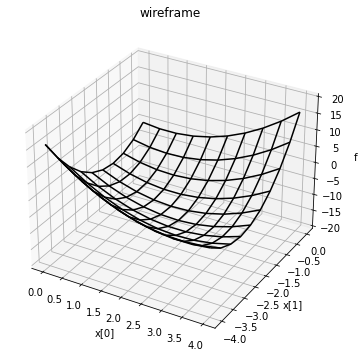

In [52]:
# %matplotlib inline - This "magic" command is no longer necessary...
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)
x = np.linspace(0, 4, 10)
y = np.linspace(-4, 0, 10)
X, Y = np.meshgrid(x, y)
Z = fxy(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')
ax.set_zlabel('f')
ax.set_zlim(bottom=-20,top=20)
ax.set_title('wireframe');
plt.show(fig)

Constructed quadratic form so its gradient is $Ax-b \implies$ quadratic has stationary point at solution of linear system.

Positive definite matrix (which is true for $A^T A$), stationary point is a minimum.

__Gradient (Steepest) Descent Method__

1) Make an initial guess at the solution, `x[0]`

2) For a given estimate `x[i]`

3) Compute the gradient `grad_f(x[i])` (to determine steepest direction)

4) Move downhill (toward the minimum) top obtain improved solution, <br>
e.g. `x[i+1] = x[i] - c *grad_f(x[i])` note that there are other (and better) ways to update the estimate to move efficiently toward the desired minimum.

5) If `np.norm(x[i+1]-x[i]) > tol` repeat from step 2; else `return x[i+1]`

Let's look at the behavior of the quadratic function and its gradient:

![kutz_Figs 2.1, 2.2](kutzFigs_2.1_2.2.png)

And consider some descent plans (which includes choice of stepsize):

![kutz_Fig2.3](kutzFig_2.3.png)

Now return to look at the specific case of our least squares example:

In [53]:
x0 = np.array([0,0])
A, b, f(x0,A,b), grad_f(x0)

(array([[168.,  26.],
        [ 26.,   5.]]),
 array([263.,  41.]),
 0.0,
 array([-2, -8]))

In [54]:
def descent_update_const(x, c):
    return x - c*grad_f(x)

In [55]:
# previously solved to get [1.52, 0.30]
c = 0.01
n = 20
x = x0
for i in range(n):
    x = descent_update_const(x, c)
    print(x)

[0.02 0.08]
[0.04 0.15]
[0.05 0.22]
[0.07 0.29]
[0.08 0.35]
[0.09 0.41]
[0.1  0.46]
[0.11 0.51]
[0.11 0.56]
[0.12 0.6 ]
[0.12 0.65]
[0.13 0.68]
[0.13 0.72]
[0.13 0.75]
[0.13 0.79]
[0.13 0.82]
[0.13 0.85]
[0.13 0.87]
[0.13 0.9 ]
[0.13 0.92]


Describe performance (or lack thereof)...

What does the quadratic look like?

Implement better approach with line search:

How far should we really move along the descent direction?<br>__Line search__ along `x[i]-c*grad_f(x[i])` to find `c` that minimizes `f(x[i+1])`.

Choose more efficient search directions:<br>Once the quadratic function has been minimized along a direction, future searches should go in orthogonal (conjugate) directions $\rightarrow$ __conjugate gradient method__

If you are interested in learning more deatils about this topic please see __"An Introduction to the Conjugate Gradient Method Without the Agonizing Pain
Edition $1 \frac{1}{4}$"__ by Jonathan Richard Shewchuk.

Here is the plot of the quadratic function for the least squares example:

In [56]:
def fxy(x,y):
    return 0.5*(168*x**2+52*x*y+5*y**2)-(263*x+41*y)

def grad_f(x):
    g0 = 168*x[0] + 26 * x[1] - 263
    g1 = 26*x[0] + 5*x[1] - 41
    return np.array([g0,g1])

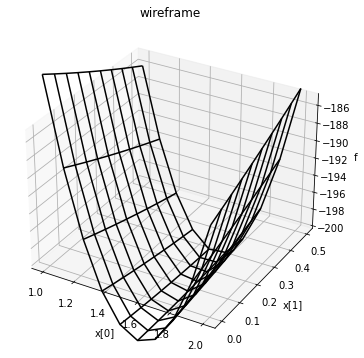

In [57]:
# %matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)
x = np.linspace(1,2, 10)
y = np.linspace(0,0.5, 10)
X, Y = np.meshgrid(x, y)
Z = fxy(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')
ax.set_zlabel('f')
ax.set_zlim(bottom=-200,top=-185)
ax.set_title('wireframe');
plt.show(fig)

Let's move on to consider another problem whjere iteration methods are useful.

__Section 2.4 - Eigenvalues, Eigenvectors, and Stability__

We have also not spent time discussing when a linear system is actually solvable.<br>How do we determine solvability?

For square systems, a unique solution exists if the matrix is non-singular, i.e. $Det(A) \neq 0$.

So we cannot compute solutions if $A$ is singular.

Mention Fredholm alternative theorem:
<br>For solvable $Ax=b$, $b$ must be orthogonal to the null space of the adjoint $A^{*T}$.

<br>Can we effectively compute solutions when $A$ is non-singular? Sometimes...

Introduce __Condition number__ as a measure of the ratio of relative residual $$\frac{||Ax-b||}{||b||}$$ to relative error $$\frac{||x-x_{exact}||}{||x_{exact}||}$$

All of these things relate to eigenvalues and eigenvectors: How?

Consider iterative computation of eigenvalues and eigenvectors.

Ratio of eigenvalues provides bounds for condition number...